In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle5 as pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
train_data = pickle.load(open('/home/vedant/IIIT/2-2/MDL/Polynomial-Regression/data/train.pkl', 'rb'))
test_data = pickle.load(open('/home/vedant/IIIT/2-2/MDL/Polynomial-Regression/data/test.pkl', 'rb'))

np.random.shuffle(train_data)
train_data = train_data.reshape((16, len(train_data)//16, 2))
train_data = np.array([ train_data[i][train_data[i][:,0].argsort()] for i in range(len(train_data)) ])

train_sets_X, train_sets_Y = train_data[:,:,0], train_data[:,:,1]
test_sets_X, test_sets_Y = test_data[:,0], test_data[:,1]

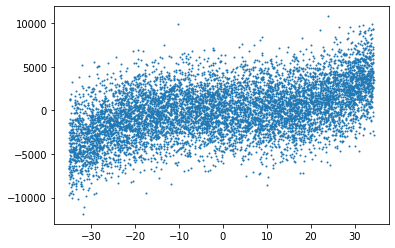

In [3]:
plt.scatter(train_sets_X, train_sets_Y, s=1)

In [4]:
def regression(test_x, x, y, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    x = np.array([poly.fit_transform(x[i].reshape(-1, 1)) for i in range(len(x))])
    test_x = poly.fit_transform(test_x.reshape(-1, 1))

    regs = [ LinearRegression() for i in range(len(x)) ]
    regs = [ regs[i].fit(x[i], y[i]) for i in range(len(x)) ]
    predicted_y = [ regs[i].predict(test_x) for i in range(len(x)) ]
    return regs, predicted_y

In [5]:
models = [ regression(test_sets_X, train_sets_X, train_sets_Y, i)[0] for i in range(1,16) ]
poly_y = [ regression(test_sets_X, train_sets_X, train_sets_Y, i)[1] for i in range(1,16) ]

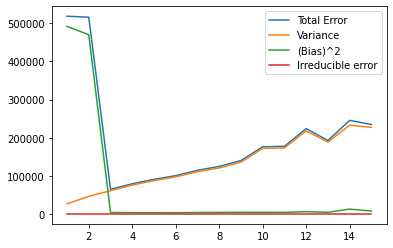

In [6]:
error = np.array(poly_y) - np.array(test_sets_Y)
mse = np.mean(np.square(error), axis=2)
average_mse = np.mean(mse, axis=1)

# Computing Variance
Expected_predicted_value = np.mean(poly_y, axis = 1)
square_difference = np.square([ np.array(poly_y[i]) - Expected_predicted_value[i] for i in range(len(poly_y)) ])
variance = np.mean(square_difference, axis=2)
average_variance = np.mean(variance, axis=1)

# Computing Bias
bias_squared = (Expected_predicted_value - test_sets_Y)**2
average_bias_squared = np.mean(bias_squared, axis=1)

# Computing Irreducible error
irreducible_error = mse - variance - np.transpose([average_bias_squared] * 16)
average_irreducible_error = average_mse - average_variance - average_bias_squared

plt.plot(range(1,16), average_mse, label='Total Error')
plt.plot(range(1,16), average_variance, label='Variance')
plt.plot(range(1,16), average_bias_squared, label='(Bias)^2')
plt.plot(range(1,16), average_irreducible_error, label='Irreducible error')
plt.legend()
plt.show()